In [38]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import math
import sys
import scipy.stats
import matplotlib.pyplot as plt
from decimal import Decimal
%matplotlib inline

In [54]:
# Importamos las librerías que utilizaremos
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
from decimal import Decimal

# Definimos las funciones que utilizaremos 
def StirlingApprox (n):
    
    return np.sqrt(2*np.pi*n)*((n/np.exp(1))**n)

def PBin(n,p,k):

    if n > 60000 or k > 60000:
        n1 , n2 = StirlingApprox (n) , StirlingApprox (k)*StirlingApprox (n-k)
    else:
        n1 , n2 = math.factorial(n) , math.factorial(k)*math.factorial(n-k)
        
    comb = n1 // n2
    return Decimal(comb)* Decimal((p**k)*((1-p)**(n-k)))

def Xt(n,p,t):
    h = 1/math.sqrt((n*p*(1-p)))
    return (t-n*p)*h

def PSn(n, p, alpha, beta):
    binomial = 0
    for k in range(alpha, beta+1):
        binomial += PBin(n,p,k)
    return binomial

def NormalApprox(n, p, alpha, beta):
    
    x_alpha = Xt(n,p,alpha-1/2)
    x_beta = Xt(n,p,beta+1/2)
    
    return Decimal(scipy.stats.norm.cdf(x_beta))-Decimal(scipy.stats.norm.cdf(x_alpha))

# Definimos los valores base (Rango de i y probabilidad p)

NPoints = 4
p = 0.5
Binomial = []
Normal = []

#Llenamos nuestras listas con los valores que calculamos

for i in range(NPoints):
    alpha = 6*(10**i)
    beta = 7*(10**i)
    n = 10**(i+1)
    Normal.append(NormalApprox(n,p,alpha,beta))
    Binomial.append(PSn(n,p,alpha,beta))

# Finalmente imprimimos y calculamos la precisión de la aproximación

print(Binomial)
print(Normal)
Prec = []
for i in range(len(Binomial)):
    Prec.append ( (abs(Normal[i] - Binomial[i])/ Binomial[i] )*100)

[Decimal('0.3222656250'), Decimal('0.02842788681284256266941235093'), Decimal('1.364232078033009212804390446E-10'), Decimal('0')]
[Decimal('0.3189916680195955533960727735'), Decimal('0.02869590230908924954889016590'), Decimal('1.557618478642552872770465910E-10'), Decimal('0')]


InvalidOperation: [<class 'decimal.DivisionUndefined'>]

[Decimal('1.015918772101258582551963617'), Decimal('0.9427907814994442718121554324'), Decimal('14.17547671862209698678472741')]
[Decimal('1.015918772101258582551963617'), Decimal('0.9427907814994442718121554324'), Decimal('14.17547671862209698678472741')]


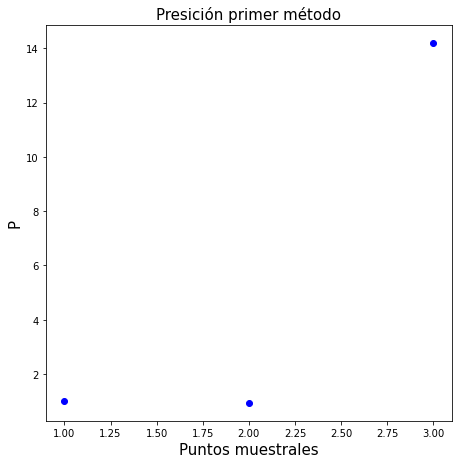

In [50]:
#Graficamos para evidenciar la dependencia.
print(Prec)
fig = plt.figure(figsize=(16,16))
ax1= fig.add_subplot(2,2,1)
print(Prec)
ax1.scatter([1,2,3],Prec, color =  'b', label=r'$Bin$')

#ax1.set_xscale('log')
ax1.set_xlabel('Puntos muestrales', fontsize=15)
ax1.set_ylabel('P', fontsize=15)

ax1.set_title("Presición primer método", fontsize = "15")




#plt.style.use('seaborn-whitegrid')
plt.show()

## Fractales

In [7]:
def fractal(Re, Im, j):
    for m in range(len(Re)):
        for n in range(len(Im)):
            z = Re[m] + 1j * Im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
                    
jit_fractal = numba.jit(nopython=True)(fractal)

In [8]:
N = 1024
j = np.zeros((N, N), np.int64)
zRe = np.linspace(-1.5, 1.5, N)
zIm = np.linspace(-1.5, 1.5, N)

#fractal(zRe, zIm, j)
jit_fractal(zRe,zIm,j)

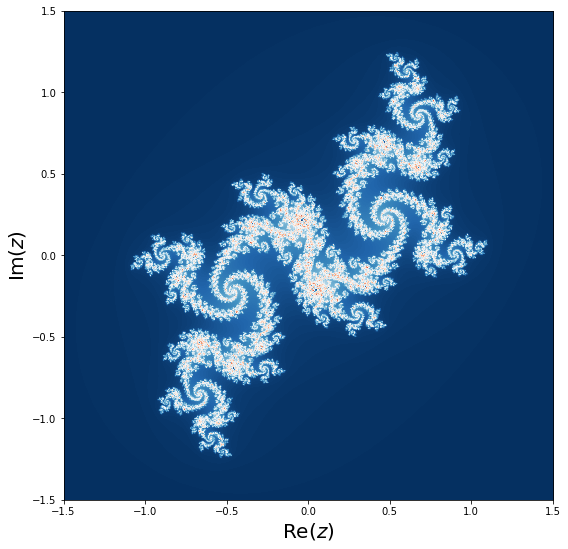

In [9]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=20)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=20)
plt.style.use('default')
plt.savefig("Fractal.jpg")
plt.show()

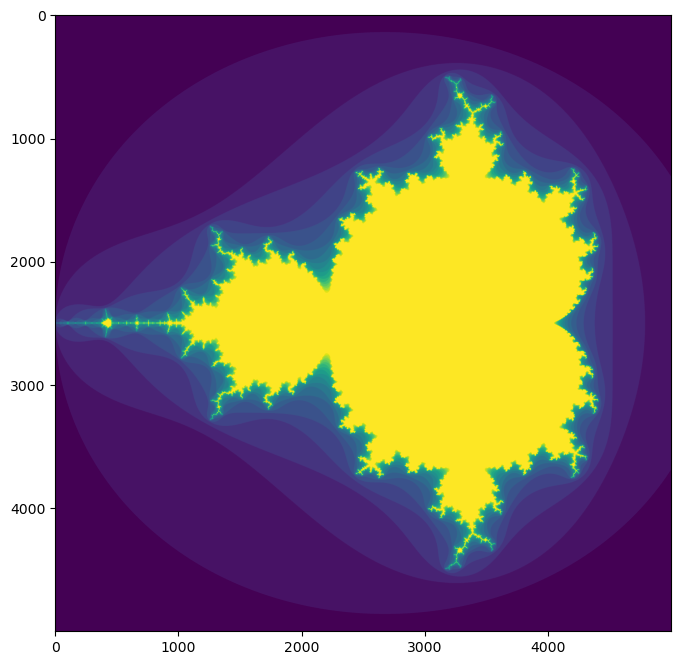

In [10]:
def mandelbrot( h,w, maxit=20 ):
    '''Crea el grafico del fractal de Mandelbrot del tamaño (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 2                        
        
    return divtime

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot(5000,5000))
plt.savefig("Mandelbrot.jpg")
plt.show()